In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Machine Leaning package
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix


In [3]:
# Useful plotting package
import seaborn as sns

# Example das Flores

In [4]:
# Load the diabetes dataset
iris = datasets.load_iris()
data = pd.DataFrame(data=iris['data'], columns=iris['feature_names'])
data['target'] = iris['target']
print(data.shape)
# data.head()

(150, 5)


In [5]:
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [6]:
# looking at the values distribution
target_dict = {0:'setosa',1:'versicolor',2:'virginica'}
data['flower'] = data.target.map(target_dict)
data.flower.value_counts()

setosa        50
versicolor    50
virginica     50
Name: flower, dtype: int64

In [7]:
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


# Vizualiando com Seaborn

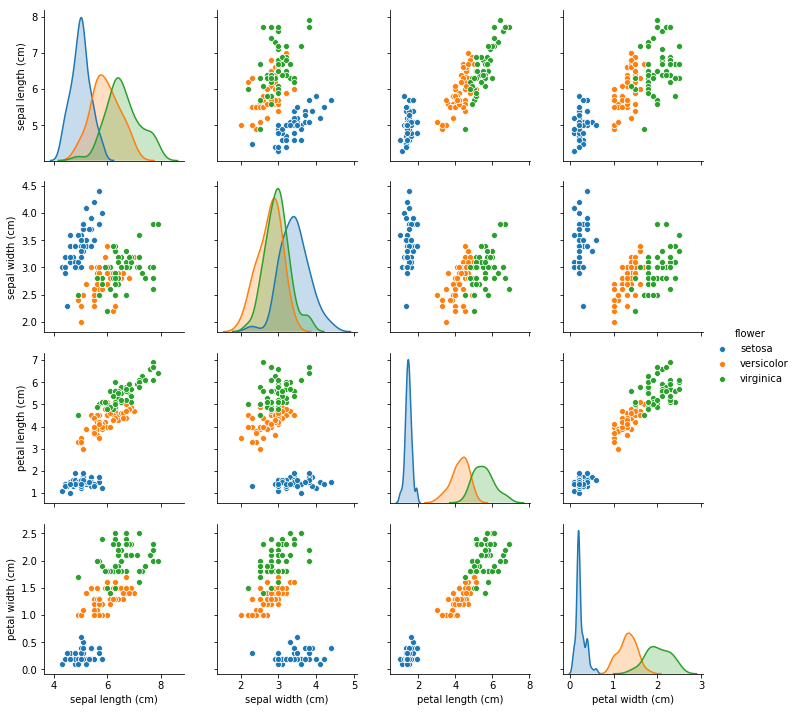

In [8]:
features = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)','petal width (cm)','flower']
sns.pairplot(data[features],hue='flower')

# Usando Regressão logística do sklearn

In [9]:
data['is_setosa'] = data['target'] == 0
data['is_versicolor'] = data['target'] == 1
data['is_virginica'] = data['target'] == 2
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower,is_setosa,is_versicolor,is_virginica
0,5.1,3.5,1.4,0.2,0,setosa,True,False,False
1,4.9,3.0,1.4,0.2,0,setosa,True,False,False
2,4.7,3.2,1.3,0.2,0,setosa,True,False,False
3,4.6,3.1,1.5,0.2,0,setosa,True,False,False
4,5.0,3.6,1.4,0.2,0,setosa,True,False,False


## Setosa

In [10]:
y_var = 'is_setosa'
reg_features = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)','petal width (cm)']
X = data[reg_features].copy()
y = data[y_var].copy()
# Splitting between train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=12)
logistic = LogisticRegression()
logistic.fit(X_train,y_train)
predict_train = logistic.predict(X_train)
predict_test = logistic.predict(X_test)
print('Setosa Acurácia-treino= %.5f' %accuracy_score(y_train,predict_train))
print('Setosa Acurácia-teste= %.5f' %accuracy_score(y_test,predict_test))

Setosa Acurácia-treino= 1.00000
Setosa Acurácia-teste= 1.00000


/Users/tiagocaruso/learning/intro_aprendizado_maquina/venv/lib/python2.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Text(0.5,1,'Matriz de Confusao')

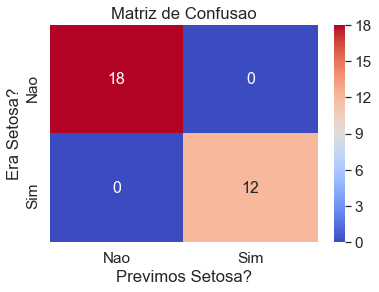

In [11]:
sns.set(font_scale=1.4)
df_cm = pd.DataFrame(confusion_matrix(y_test, predict_test), 
                         index = ['Nao', 'Sim'], columns = ['Nao', 'Sim'])
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16},fmt='.0f',cmap='coolwarm')# font size
plt.xlabel('Previmos Setosa?')
plt.ylabel('Era Setosa?')
plt.title('Matriz de Confusao')

## Versicolor

In [12]:
y_var = 'is_versicolor'
X = data[reg_features].copy()
y = data[y_var].copy()
# Splitting between train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=12)
logistic = LogisticRegression()
logistic.fit(X_train,y_train)
predict_train = logistic.predict(X_train)
predict_test = logistic.predict(X_test)
print('Versicolor Acurácia-treino= %.5f' %accuracy_score(y_train,predict_train))
print('Versicolor Acurácia-teste= %.5f' %accuracy_score(y_test,predict_test))

Versicolor Acurácia-treino= 0.70833
Versicolor Acurácia-teste= 0.66667


Text(0.5,1,'Matriz de Confusao')

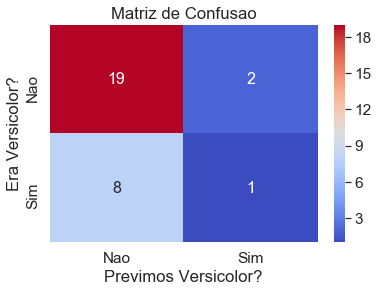

In [13]:
sns.set(font_scale=1.4)#for label size
df_cm = pd.DataFrame(confusion_matrix(y_test, predict_test), 
                         index = ['Nao', 'Sim'], columns = ['Nao', 'Sim'])
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16},fmt='.0f',cmap='coolwarm')# font size
plt.xlabel('Previmos Versicolor?')
plt.ylabel('Era Versicolor?')
plt.title('Matriz de Confusao')

## Virginica

In [14]:
y_var = 'is_virginica'
X = data[reg_features].copy()
y = data[y_var].copy()
# Splitting between train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=12)
logistic = LogisticRegression()
logistic.fit(X_train,y_train)
predict_train = logistic.predict(X_train)
predict_test = logistic.predict(X_test)
print('Virginica acurácia-treino= %.5f' %accuracy_score(y_train,predict_train))
print('Virginica acurácia-teste= %.5f' %accuracy_score(y_test,predict_test))

Virginica acurácia-treino= 0.97500
Virginica acurácia-teste= 0.96667


Text(0.5,1,'Matriz de Confusao')

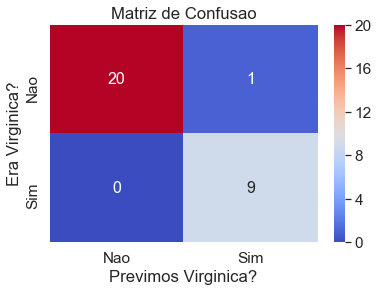

In [15]:
sns.set(font_scale=1.4)
df_cm = pd.DataFrame(confusion_matrix(y_test, predict_test), 
                         index = ['Nao', 'Sim'], columns = ['Nao', 'Sim'])
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16},fmt='.0f',cmap='coolwarm')# font size
plt.xlabel('Previmos Virginica?')
plt.ylabel('Era Virginica?')
plt.title('Matriz de Confusao')

In [16]:
logistic.predict(X_train)

array([False, False,  True, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False,  True, False, False, False, False,  True, False,
       False,  True, False,  True, False,  True,  True,  True,  True,
       False, False, False,  True,  True, False,  True,  True, False,
       False, False,  True,  True, False, False, False, False, False,
       False, False, False,  True,  True, False,  True, False, False,
       False, False,  True, False,  True, False, False,  True,  True,
       False,  True,  True, False, False,  True, False, False,  True,
       False, False, False, False, False, False,  True,  True, False,
       False,  True, False,  True, False, False, False,  True,  True,
       False,  True,  True, False, False, False, False,  True,  True,
        True, False,  True,  True,  True, False, False, False, False,
        True,  True, False])

In [17]:
logistic.predict_proba(X_train)[:,1]

array([3.79223063e-05, 8.65065941e-02, 8.75068370e-01, 6.12208916e-06,
       8.89564549e-01, 6.71641930e-06, 6.02768758e-02, 1.30719045e-01,
       3.05641821e-06, 9.94512854e-02, 3.71490557e-02, 1.02688471e-04,
       2.13382353e-04, 3.20751135e-05, 7.71054068e-05, 1.78634532e-05,
       3.23408228e-05, 1.23844494e-05, 8.41495896e-01, 5.15327167e-05,
       9.44012607e-01, 2.18354216e-01, 1.63047211e-01, 3.20471814e-01,
       2.10505084e-05, 8.28063483e-01, 1.23696168e-01, 2.45785230e-01,
       8.73196050e-01, 7.23910028e-05, 9.24892809e-01, 3.44352057e-05,
       9.29417732e-01, 8.77193917e-01, 9.56374359e-01, 6.03966562e-01,
       1.44540940e-01, 9.00185295e-02, 8.75990161e-02, 7.45864219e-01,
       9.37776241e-01, 3.02184458e-05, 9.15589759e-01, 6.10239275e-01,
       9.08453161e-05, 2.56159137e-01, 1.91778692e-05, 8.59240212e-01,
       9.44032709e-01, 1.41398280e-04, 1.31184970e-01, 1.23714858e-01,
       1.39564434e-04, 4.27868679e-05, 2.30151485e-01, 3.41091307e-01,
      

# Prevendo múltiplas clásses simulataneamente

In [18]:
# data.flower

In [19]:
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower,is_setosa,is_versicolor,is_virginica
0,5.1,3.5,1.4,0.2,0,setosa,True,False,False
1,4.9,3.0,1.4,0.2,0,setosa,True,False,False
2,4.7,3.2,1.3,0.2,0,setosa,True,False,False
3,4.6,3.1,1.5,0.2,0,setosa,True,False,False
4,5.0,3.6,1.4,0.2,0,setosa,True,False,False


In [20]:
y_var = 'flower'
X = data[reg_features].copy()
y = data[y_var].copy()
# Splitting between train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=12)
logistic = LogisticRegression()
logistic.fit(X_train,y_train)
predict_train = logistic.predict(X_train)
predict_test = logistic.predict(X_test)
print('Acurácia-treino= %.5f' %accuracy_score(y_train,predict_train))
print('Acurácia-teste= %.5f' %accuracy_score(y_test,predict_test))

Acurácia-treino= 0.96667
Acurácia-teste= 0.96667


/Users/tiagocaruso/learning/intro_aprendizado_maquina/venv/lib/python2.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [ ]:
logistic.predict(X_train)

Text(0.5,1,'Matriz de confusao')

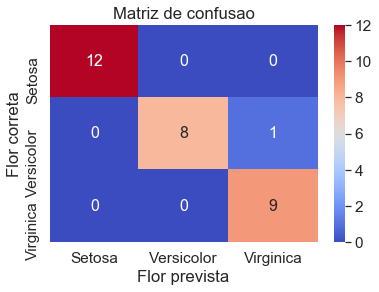

In [21]:
sns.set(font_scale=1.4)#for label size
df_cm = pd.DataFrame(confusion_matrix(y_test, predict_test), 
                     index = ['Setosa', "Versicolor","Virginica"], 
                    columns = ['Setosa', "Versicolor","Virginica"])
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16},fmt='.0f',cmap='coolwarm')# font size
plt.xlabel('Flor prevista')
plt.ylabel('Flor correta')
plt.title('Matriz de confusao')